In [2]:
from connectivity import figures

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

No handles with labels found to put in legend.


<Figure size 921.6x633.6 with 0 Axes>

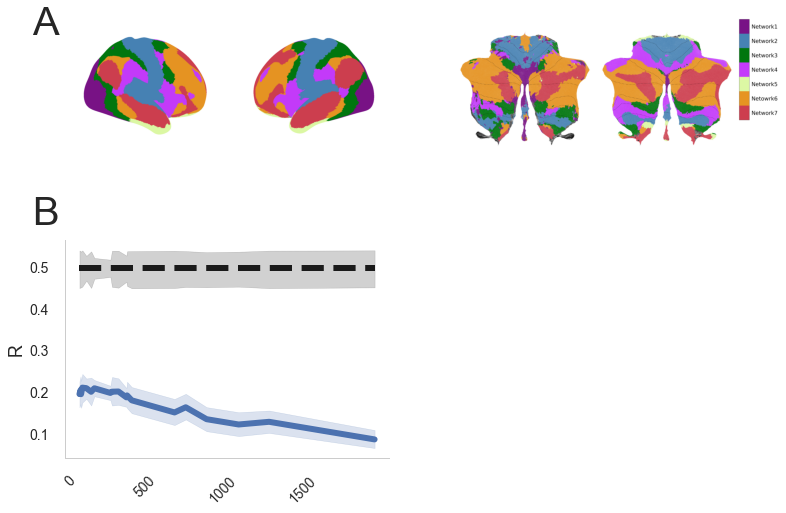

In [122]:
figures.fig1()


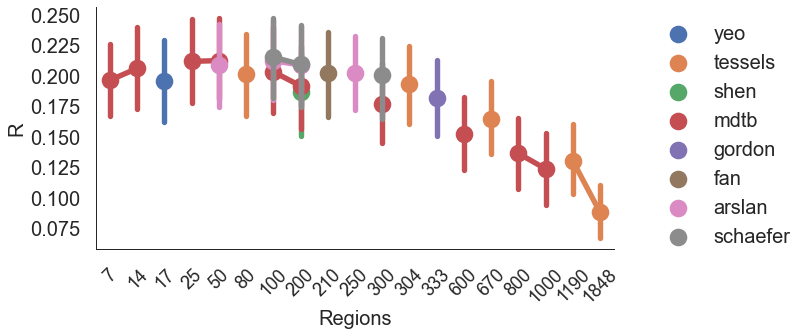

In [159]:
vis.plot_predictions_WTA(data='eval', method='WTA')
# vis.plot_predictions_WTA(data='train')

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from pathlib import Path
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import re

import connectivity.data as cdata
import connectivity.constants as const
import connectivity.nib_utils as nio

atlases = ['atl-Buckner7_sp-SUIT'] #'yeo7_wta_suit'

dirs = const.Dirs()

fpaths = [os.path.join(dirs.conn_eval_dir, 'WTA_yeo7', 'group_R_vox.nii')] # os.path.join(dirs.conn_eval_dir, 'WTA_mdtb_wb_007', 'group_R_vox.nii')

atlas_dir = os.path.join(dirs.base_dir, 'cerebellar_atlases')

df_all = pd.DataFrame()
for (fpath, atlas) in zip(fpaths, atlases):
    rois = cdata.read_suit_nii(atlas_dir + f'/{atlas}.nii')

    # get roi colors
    rgba, cpal, cmap = nio.get_gifti_colors(fpath=atlas_dir + f'/{atlas}.label.gii')
    labels = nio.get_gifti_labels(fpath=atlas_dir + f'/{atlas}.label.gii')

    data = cdata.read_suit_nii(fpath)
    roi_mean, regs = cdata.average_by_roi(data, rois)
    fname = Path(fpath).stem
    df1 = pd.DataFrame({'roi_mean': list(np.hstack(roi_mean)),
                    'regions': list(regs),
                    'labels': list(labels),
                    'fnames': np.repeat(fname, len(regs)),
                    'atlas': np.repeat(atlas, len(regs))
                    })
    df_all = pd.concat([df_all, df1])

FileNotFoundError: No such file or no access: '/Users/maedbhking/Documents/cerebellum_connectivity/data/cerebellar_atlases/atl-Buckner7_sp-SUIT.nii'